In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Read the CSV file
df = pd.read_csv('bengaluruhousedata.csv')
df.head()

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [63]:
df.shape

(13320, 9)

In [64]:
df.describe()
df.area_type.value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

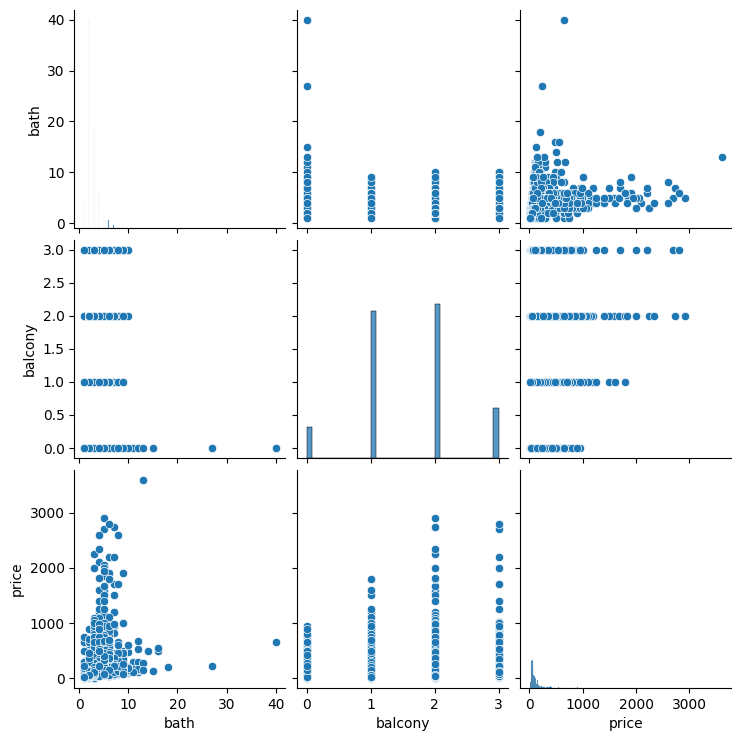

In [112]:
sb.pairplot(df)

In [65]:
#assumed that these four columns are not important to make a model
df1 = df.drop(['area_type','society','balcony','availability'],axis='columns')

In [66]:
df1.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [67]:
df1.shape

(13320, 5)

In [68]:
df2 = df1.dropna()
df2.isnull().sum()

df2.shape

(13246, 5)

In [69]:
df2['bedroom'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))
df2.head()
df2.drop(['size'],axis=1)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10380\2336645145.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bedroom'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))


,location,total_sqft,bath,price,bedroom
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2
...,...,...,...,...,...
13315,Whitefield,3453,4.0,231.00,5
13316,Richards Town,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,1141,2.0,60.00,2
13318,Padmanabhanagar,4689,4.0,488.00,4


In [70]:
df2.bedroom.value_counts()

bedroom
2     5527
3     4832
4     1395
1      649
5      353
6      221
7      100
8       89
9       54
10      14
11       4
27       1
19       1
16       1
43       1
14       1
12       1
13       1
18       1
Name: count, dtype: int64

In [71]:
df2[df2.bedroom>25]

,location,size,total_sqft,bath,price,bedroom
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [72]:
df2.total_sqft.unique()   #1133-1384 is a range and should convert it to a single number

def float_(x):
    try:
        float(x)
        return True
    except ValueError:
        return False
df2[~df2['total_sqft'].apply(float_)].head(10)

,location,size,total_sqft,bath,price,bedroom
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [73]:
df2.drop('size', axis=1, inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10380\1102472180.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop('size', axis=1, inplace=True)


In [74]:
# in total_sqft we also have some entered data like 34.46Sq. Meter. so I want to clean this column more.
def sqft_to_num(x):
    y = x.split('-')
    if len(y) == 2:
        return (float(y[0]) + float(y[1])) / 2
    try:
        return float(x)
    except ValueError:
        return None
 
    
df3 = df2.copy()
df3.total_sqft = df3.total_sqft.apply(sqft_to_num)
df3 = df3[df3.total_sqft.notnull()]
df3.loc[137]


location      8th Phase JP Nagar
total_sqft                1073.5
bath                         2.0
price                     54.005
bedroom                        2
Name: 137, dtype: object

In [75]:
df3.reset_index(drop=True, inplace=True)

In [76]:
df3.shape

(13200, 5)

In [77]:
df4 = df3.copy()
df4['price_per_sqft'] = df4['price']*100000/df4['total_sqft']
df4.head()

,location,total_sqft,bath,price,bedroom,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [78]:
len(df4.location.unique())

1298

In [79]:
df4.location = df4.location.apply(lambda x: x.strip())
locationstats = df4['location'].value_counts(ascending=False)
locationstats

location
Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: count, Length: 1287, dtype: int64

In [80]:
len(locationstats[locationstats<10])

1033

In [81]:
less = locationstats[locationstats<10]
print(less)

location
2nd Phase JP Nagar           9
Chandra Layout               9
Mathikere                    9
Kaverappa Layout             9
Peenya                       9
                            ..
Rajanna Layout               1
Subramanyanagar              1
Lakshmipura Vidyaanyapura    1
Malur Hosur Road             1
Abshot Layout                1
Name: count, Length: 1033, dtype: int64


In [82]:
df4.location = df4.location.apply(lambda x: 'other' if x in less else x)
len(df4.location.unique())

255

In [83]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df4 = remove_pps_outliers(df4)
df4.shape

(11389, 6)

In [84]:
def remove_bedroom_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bedroom'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bedroom'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df4 = remove_bedroom_outliers(df4)
df4.shape

(8039, 6)

# another way to detect & remove Outliers

In [ ]:

#def detect_outliers(data):
    #Q1 = np.percentile(data, 25)
    #Q3 = np.percentile(data, 75)
    #IQR = Q3 - Q1
    #lower_bound = Q1 - 1.5 * IQR
    #upper_bound = Q3 + 1.5 * IQR

    #outliers_indices = []
    #for val in data:
     #   if val < lower_bound or val > upper_bound:
      #      outliers_indices.append(val)
    #return outliers_indices
#outlier_sqft_indices = detect_outliers(df4['total_sqft'])
#outlier_sqft_indices = df4[df4['total_sqft'].isin(outlier_sqft_indices)].index
#df4 = df4.drop(outlier_sqft_indices)

In [86]:
#outlier_bath_indices = detect_outliers(df4['bath'])
#outlier_bath_indices = df4[df4['bath'].isin(outlier_sqft_indices)].index
#df4 = df4.drop(outlier_bath_indices)

In [87]:
#outlier_bedroom_indices = detect_outliers(df4['bedroom'])
#outlier_bedroom_indices = df4[df4['bedroom'].isin(outlier_sqft_indices)].index
#df4 = df4.drop(outlier_bedroom_indices)

In [88]:
df4.drop('price_per_sqft',axis=1,inplace= True)

In [89]:
df4.shape

(8039, 5)

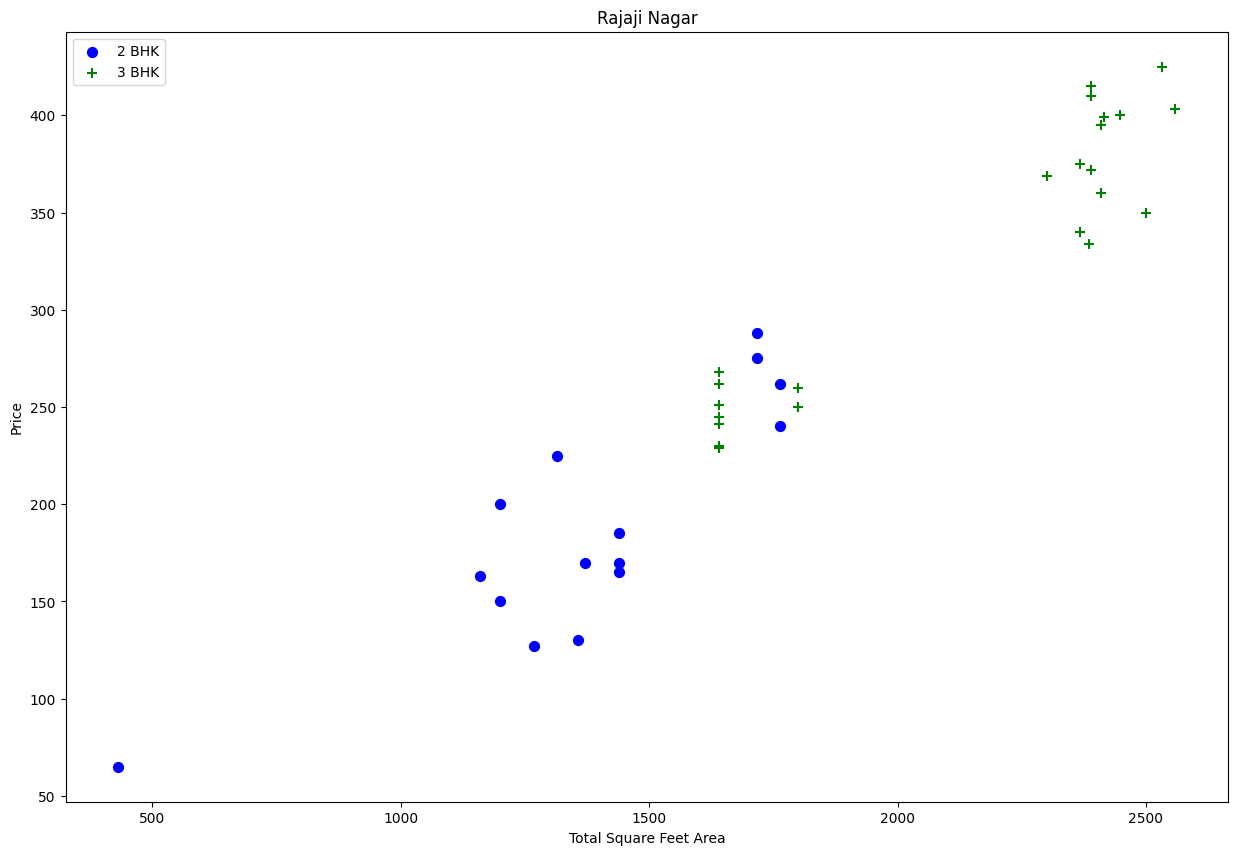

In [90]:
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bedroom==2)]
    bhk3 = df[(df.location==location) & (df.bedroom==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df4,"Rajaji Nagar")

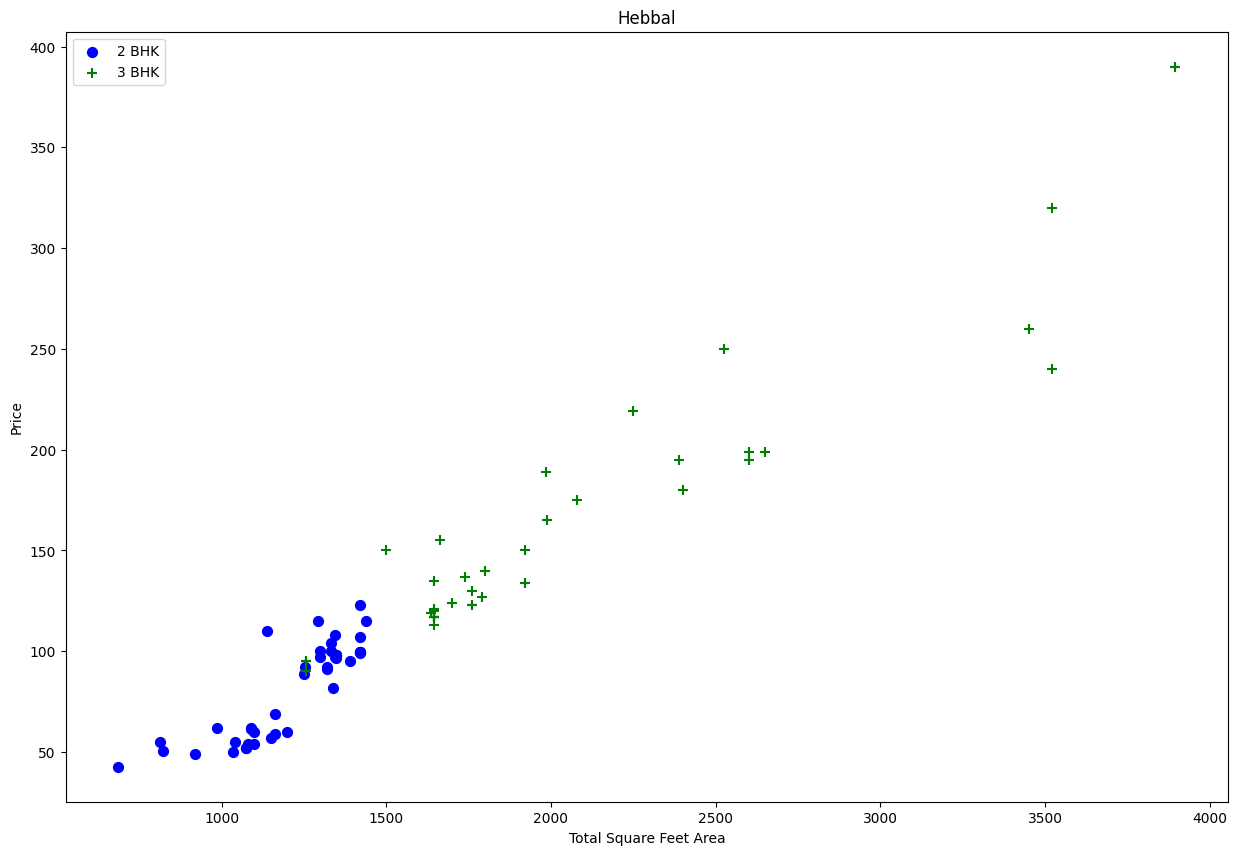

In [91]:
plot_scatter_chart(df4,"Hebbal")

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10380\159434121.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(data=df4,y='bath',palette = 'pastel')
C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Lenovo\AppData\Roaming\Python\

<Axes: xlabel='count', ylabel='bath'>

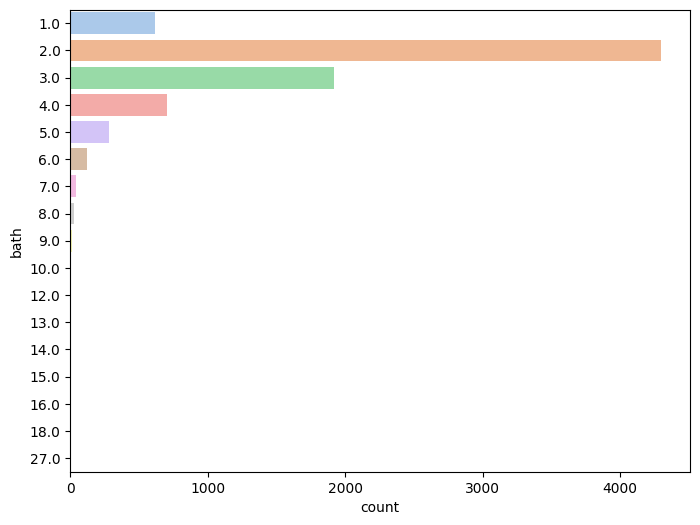

In [92]:
plt.figure(figsize=(8, 6))
sb.countplot(data=df4,y='bath',palette = 'pastel')

<Figure size 800x600 with 0 Axes>

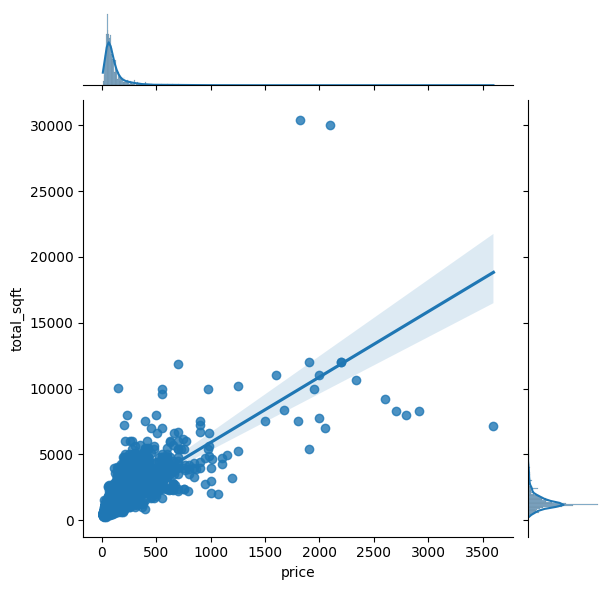

In [93]:
plt.figure(figsize=(8, 6))
sb.jointplot(data=df4,y='total_sqft',x='price',kind='reg')

<Axes: >

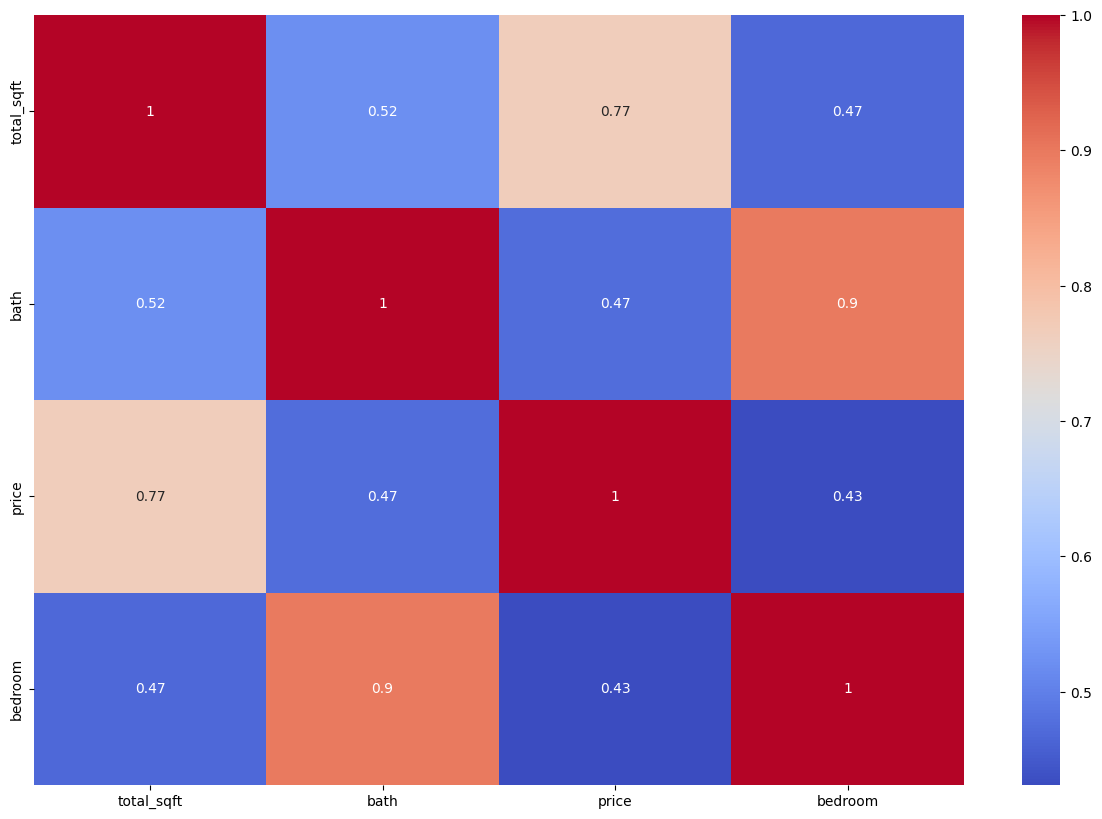

In [113]:
df4.corr(numeric_only=True)['price']
sb.heatmap(df4.corr(numeric_only=True),cmap = "coolwarm", annot=True)

In [95]:
df4

,location,total_sqft,bath,price,bedroom
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1200.0,6.0,125.0,6
3,1st Block Jayanagar,1875.0,2.0,235.0,3
4,1st Block Jayanagar,930.0,4.0,85.0,7
...,...,...,...,...,...
11380,other,1400.0,7.0,218.0,7
11383,other,1353.0,2.0,110.0,2
11384,other,812.0,1.0,26.0,1
11387,other,1200.0,5.0,325.0,4


In [96]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8039 entries, 0 to 11388
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    8039 non-null   object 
 1   total_sqft  8039 non-null   float64
 2   bath        8039 non-null   float64
 3   price       8039 non-null   float64
 4   bedroom     8039 non-null   int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 376.8+ KB


In [97]:
dfdummies = pd.get_dummies(df4.location).astype(int)

In [98]:
df5 = pd.concat([df4,dfdummies.drop('other',axis = 1)],axis = 1)

In [115]:
df5.shape

(8039, 258)

In [100]:
df5.reset_index = True

******* bath *******


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10380\2283946755.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[variable], bins=30)
C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


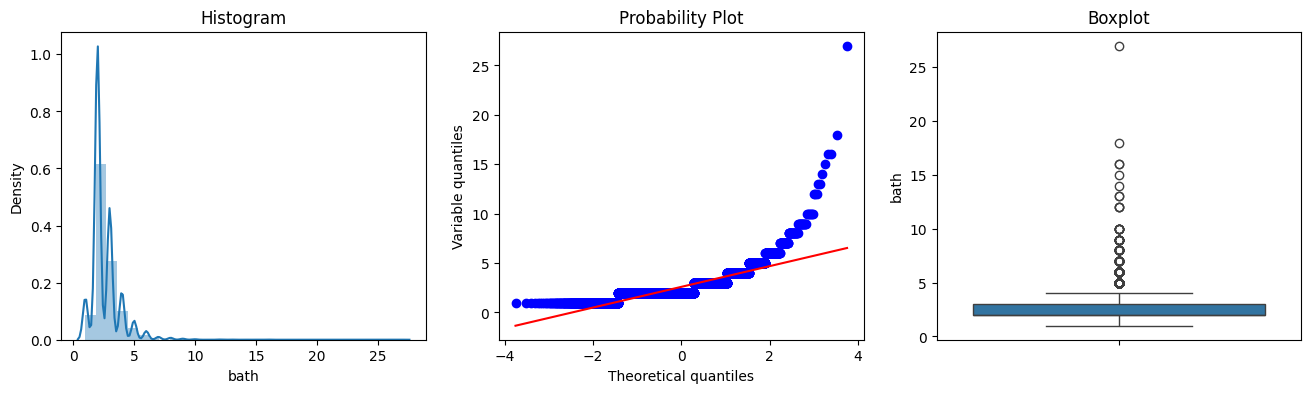

******* total_sqft *******


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10380\2283946755.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[variable], bins=30)
C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


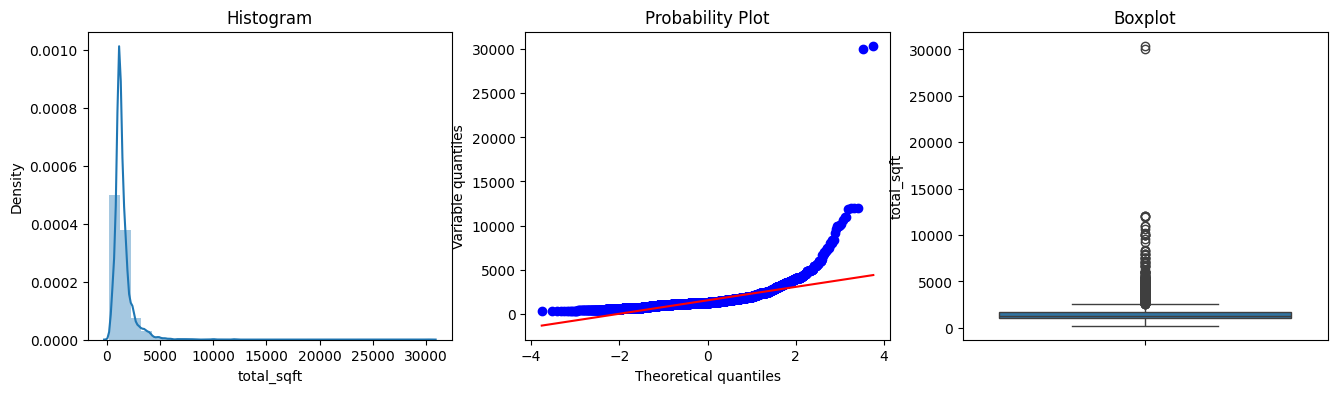

******* bedroom *******


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10380\2283946755.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[variable], bins=30)
C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


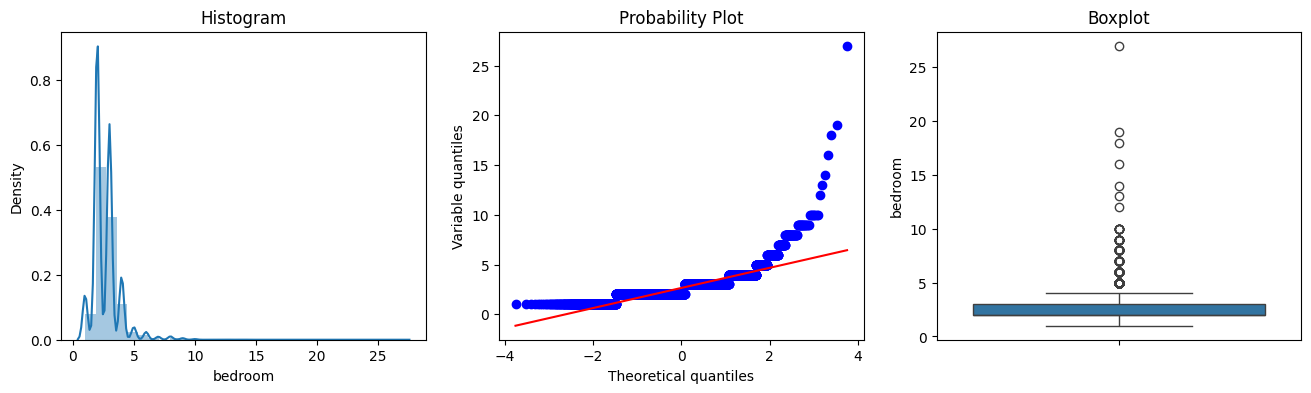

******* price *******


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10380\2283946755.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[variable], bins=30)
C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


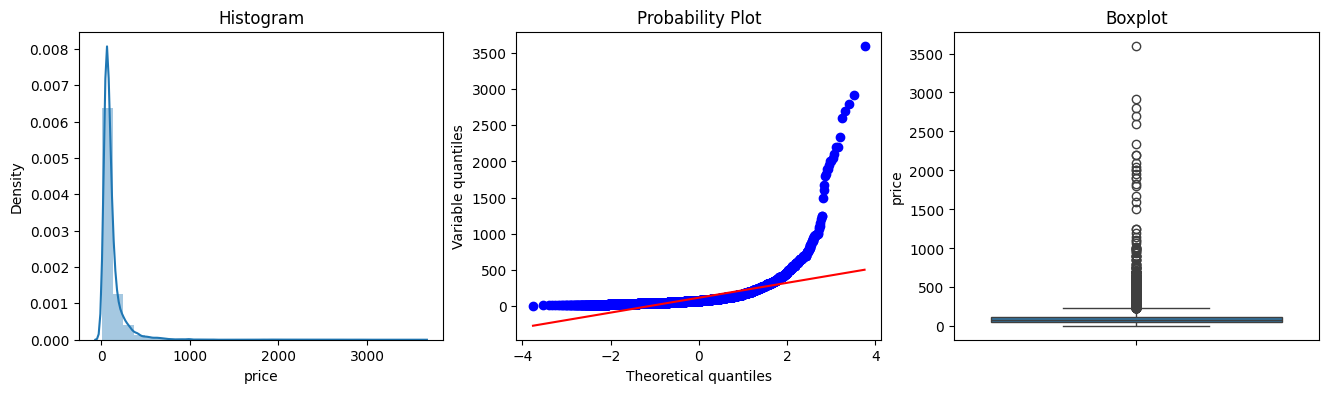

In [114]:
# function to create histogram, Q-Q plot and boxplot
 
# for Q-Q plots
import scipy.stats as stats
 
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments
 
    # define figure size
    plt.figure(figsize=(16, 4))
 
    # histogram
    plt.subplot(1, 3, 1)
    sb.distplot(df[variable], bins=30)
    plt.title('Histogram')
 
    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')
 
    # boxplot
    plt.subplot(1, 3, 3)
    sb.boxplot(y=df[variable])
    plt.title('Boxplot')
 
    plt.show()
num_var = ["bath","total_sqft","bedroom","price"]
for var in num_var:
    print("******* {} *******".format(var))
    diagnostic_plots(df5, var)

In [107]:
df5.drop('location',axis = 1,inplace = True)

In [108]:
x = df5.drop('price',axis = 1)
y = df5['price']

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=8)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [117]:

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6431, 257), (1608, 257), (6431,), (1608,))

In [110]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)
reg.score(X_test,y_test)

0.6153263663368674

In [111]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=1)

cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.69713541, 0.79066811, 0.69705342, 0.65086209, 0.70268108])

In [125]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 638, in _validate_params
    val

,model,best_score,best_params
0,linear_regression,0.683814,{}
1,lasso,0.595818,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.315996,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [126]:
import joblib
joblib.dump(reg, 'model_filename2.pkl')

['model_filename2.pkl']